In [100]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import math
import random
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.cross_validation import ShuffleSplit, train_test_split
from sklearn.metrics import mean_squared_error
path_final = 'dados_finais/'
from sklearn import preprocessing
from sklearn import svm
import os
%matplotlib inline
import bokeh.sampledata
from bokeh.io import output_notebook, show
from bokeh.plotting import figure,show
from datetime import datetime as dt

In [66]:
df_train = pd.read_csv('treino_final.csv')

In [69]:
df_outliers = df_train[(df_train['day'] >= 1) & (df_train['day'] <= 7)]


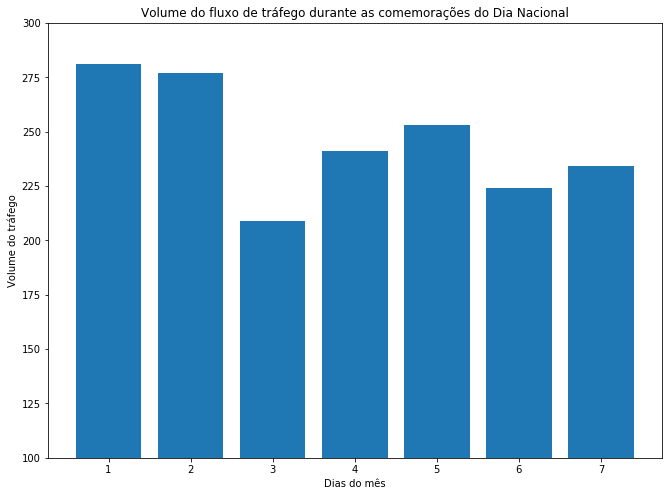

In [136]:
#fig = figure(plot_width=400, plot_height=400)
plt.bar(df_outliers['day'], df_outliers['volume'])
#fig.circle(dataset['day'], dataset['volume'], fill_color="yellow", size=10)
plt.rcParams['figure.figsize'] = (11,8)
plt.xlabel('Dias do mês')
plt.ylabel('Volume do tráfego')
plt.title('Volume do fluxo de tráfego durante as comemorações do Dia Nacional')
plt.ylim(100, 300)
plt.show()

In [150]:
df_normal = df_train[(df_train['day'] >= 8) & (df_train['day'] <= 14)]


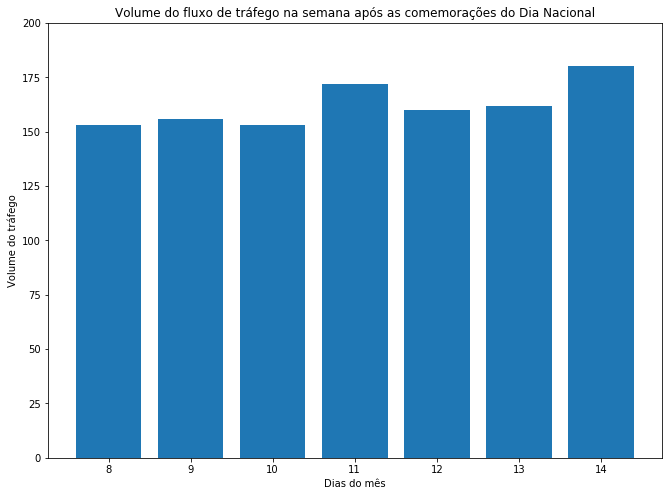

In [158]:
#fig = figure(plot_width=400, plot_height=400)
df_train['time'] = pd.to_datetime(df_train['time'], format = '%Y-%m-%d %H:%M:%S')
plt.bar(df_normal['day'], df_normal['volume'])
#fig.circle(dataset['day'], dataset['volume'], fill_color="yellow", size=10)
plt.rcParams['figure.figsize'] = (11,8)
plt.xlabel('Dias do mês')
plt.ylabel('Volume do tráfego')
plt.title('Volume do fluxo de tráfego na semana após as comemorações do Dia Nacional')
plt.ylim(0, 200)
plt.show()

In [84]:
df_train['time'] = pd.to_datetime(df_train['time'], format = '%Y-%m-%d %H:%M:%S')
df_train['date'] = df_train['time'].dt.date

In [85]:
df_train

,time,tollgate_id,direction,time_window,volume,day,hour,minute,week,weekend,am_pm,volume_anterior,volume_anterior_2,volume_proximo,volume_proximo_2,avg_vol_dia_semana,desvio_padrao,date
0,2016-09-19 00:00:00,1,0,"[00:00:00,00:20:00)",13,19,0,0,0,0,1,0.0,0.0,6.0,9.0,13.166667,4.750439,2016-09-19
1,2016-09-19 00:00:00,1,1,"[00:00:00,00:20:00)",140,19,0,0,0,0,1,0.0,0.0,56.0,31.0,109.833333,45.327328,2016-09-19
2,2016-09-19 00:00:00,2,0,"[00:00:00,00:20:00)",2,19,0,0,0,0,1,0.0,0.0,1.0,2.0,2.750000,0.957427,2016-09-19
3,2016-09-19 00:00:00,3,0,"[00:00:00,00:20:00)",17,19,0,0,0,0,1,0.0,0.0,16.0,16.0,17.000000,2.756810,2016-09-19
4,2016-09-19 00:00:00,3,1,"[00:00:00,00:20:00)",181,19,0,0,0,0,1,0.0,0.0,112.0,93.0,126.000000,52.680167,2016-09-19
5,2016-09-19 00:20:00,1,0,"[00:20:00,00:40:00)",6,19,0,20,0,0,1,13.0,0.0,9.0,10.0,10.166667,3.816630,2016-09-19
6,2016-09-19 00:20:00,1,1,"[00:20:00,00:40:00)",56,19,0,20,0,0,1,140.0,0.0,31.0,4.0,51.500000,16.428634,2016-09-19
7,2016-09-19 00:20:00,3,0,"[00:20:00,00:40:00)",16,19,0,20,0,0,1,17.0,0.0,16.0,17.0,17.166667,3.430258,2016-09-19
8,2016-09-19 00:20:00,3,1,"[00:20:00,00:40:00)",112,19,0,20,0,0,1,181.0,0.0,93.0,4.0,83.666667,32.903900,2016-09-19
9,2016-09-19 00:40:00,1,0,"[00:40:00,01:00:00)",9,19,0,40,0,0,1,6.0,13.0,10.0,14.0,8.500000,2.664583,2016-09-19


In [108]:
df_train['date'] = pd.to_datetime(df_train['date'])


df_normal_2 = df_train[(df_train['date'] >= '2016-09-23') & (df_train['date'] <= '2016-09-29')]


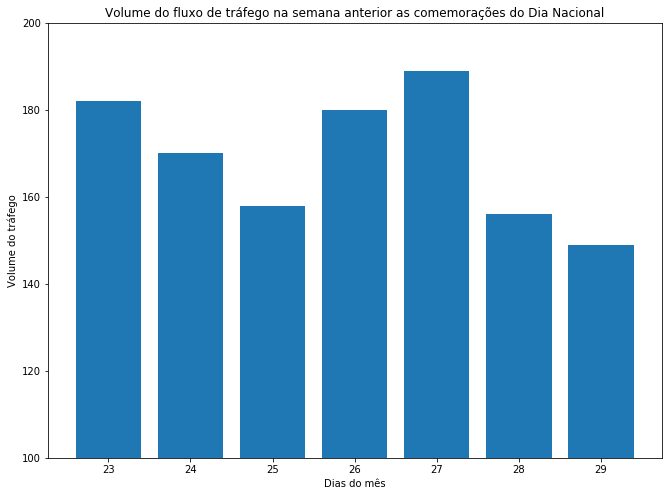

In [139]:
plt.bar(df_normal_2['day'], df_normal_2['volume'])
#fig.circle(dataset['day'], dataset['volume'], fill_color="yellow", size=10)
plt.rcParams['figure.figsize'] = (11,8)
plt.xlabel('Dias do mês')
plt.ylabel('Volume do tráfego')
plt.title('Volume do fluxo de tráfego na semana anterior as comemorações do Dia Nacional')
plt.ylim(100, 200)
plt.show()

In [169]:
df_day_normal_23 = df_train[(df_train['date'] == '2016-10-10')]

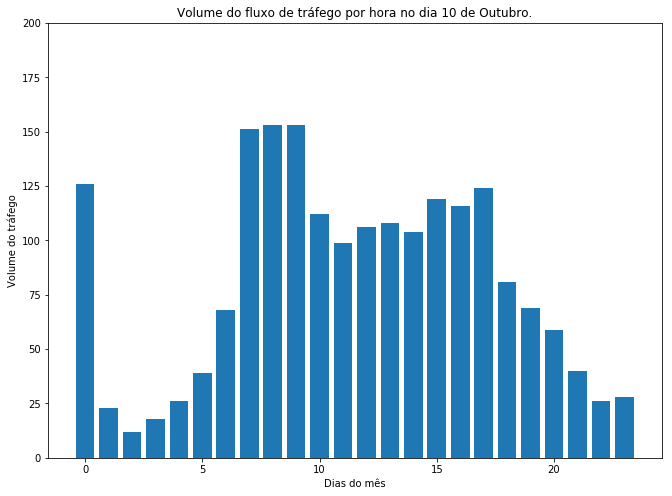

In [170]:
plt.bar(df_day_normal_23['hour'], df_day_normal_23['volume'])
#fig.circle(dataset['day'], dataset['volume'], fill_color="yellow", size=10)
plt.rcParams['figure.figsize'] = (11,8)
plt.xlabel('Dias do mês')
plt.ylabel('Volume do tráfego')
plt.title('Volume do fluxo de tráfego por hora no dia 10 de Outubro.')
plt.ylim(0, 200)
plt.show()

In [128]:
df_day_normal_fim_de_semana_8 = df_train[(df_train['date'] == '2016-10-01')]

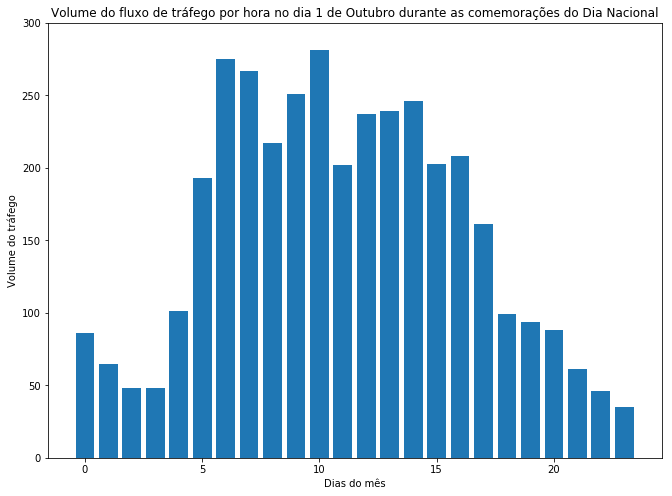

In [145]:
plt.bar(df_day_normal_fim_de_semana_8['hour'], df_day_normal_fim_de_semana_8['volume'])
#fig.circle(dataset['day'], dataset['volume'], fill_color="yellow", size=10)
plt.rcParams['figure.figsize'] = (11,8)
plt.xlabel('Dias do mês')
plt.ylabel('Volume do tráfego')
plt.title('Volume do fluxo de tráfego por hora no dia 1 de Outubro durante as comemorações do Dia Nacional')
plt.ylim(0, 300)
plt.show()

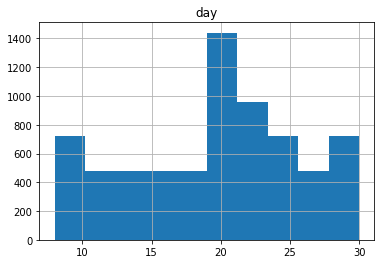

In [67]:
X_df = pd.DataFrame(data=df_train)
X_df['LogMedHouseVal'] = values_train
_ = X_df.hist(column=['day'])

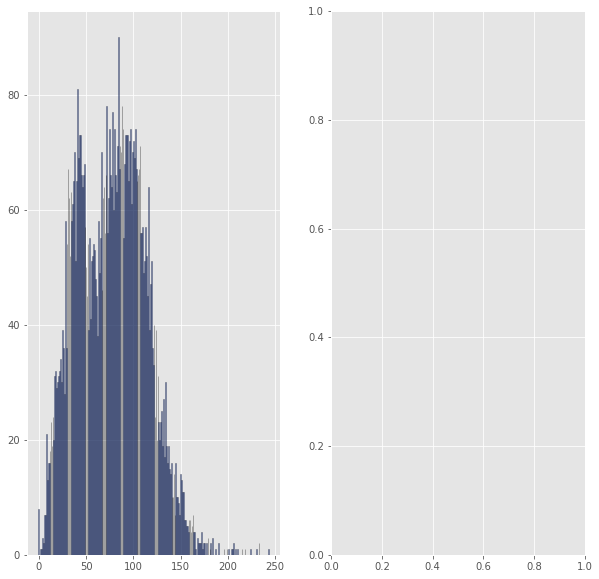

In [92]:
# the histogram of the data
volume = df_train['volume'].value_counts().values
time = df_train['volume'].value_counts().index
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.bar(time, volume, ec = "k", alpha = .6, color = "royalblue")
plt.subplot(1,2,2)

In [31]:
dataset = df_train[ df_train['day'] >= 28 ]


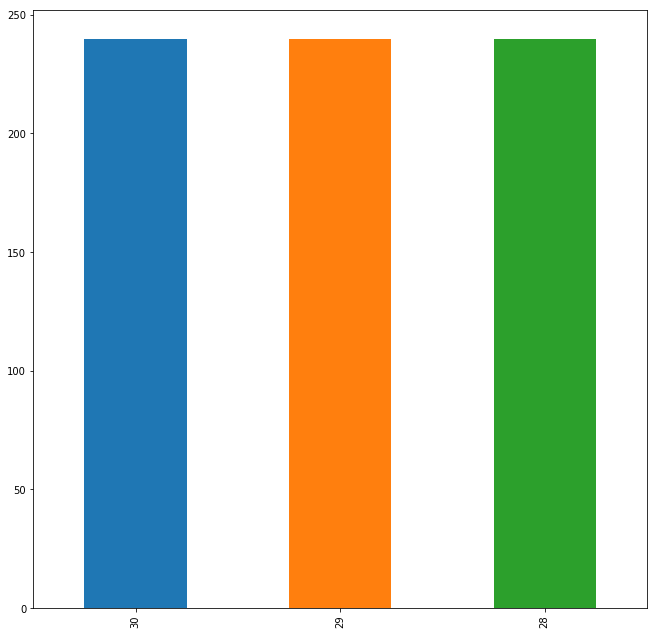

In [41]:
dataset['day'].value_counts().plot(kind='bar');
#plt.rcParams['figure.figsize'] = (11,11)

In [35]:
dataset['volume'].values

array([ 35,  52,  56,  97,  86, 116,   4,  12,  24,  28,  34,  34,  14,
        17,  25,  31,  38,  47,  12,  17,  30,  37,  47,  31,  15,  24,
        35,  84,  74, 108,  33,  46,  57,  92,  91, 107,  36,  59,  99,
       129, 129, 142,  26,  58,  88, 112, 113, 151,  44,  68, 100, 116,
       124, 155,  47,  54,  62,  78,  86, 112,  37,  38,  50,  56,  70,
        88,  43,  63,  64,  76, 107, 116,  35,  40,  60,  62,  70,  95,
        19,  32,  33,  59,  56,  70,  30,  46,  61,  69,  69, 100,  91,
       103,  88, 107,  68,  31,  65,  55,  60,  56,  53,  37,  84, 102,
       137, 122, 130,  96,  17,   8,  12,  19,  58,  71,  78,  83,  76,
        76,  79,  82, 130, 141, 128, 133, 160, 127,  93, 107, 123, 104,
       112, 119,  84, 117, 114, 124, 120,  97, 160, 184, 243, 208, 190,
       215, 102,  85,  91,  82,  82,  81,  58,  56,  90,  98,  87,  94,
       115,  87,  67,  89,  98,  83,  81,  84,  95,  80,  85,  84,  95,
        90,  96, 115,  78,  93,  97, 124, 104,  94, 118,  76,  3

In [ ]:
param_grid = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10,15,20],
    'max_features': [None],
    'n_estimators': [200, 300, 500, 800, 1200, 1500]
}
# Create a based model
gbrt = GradientBoostingRegressor()
# Instantiate the grid search model
grid_search_gbrt = GridSearchCV(estimator = gbrt, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 2)

In [ ]:
grid_search_gbrt.fit(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_train)

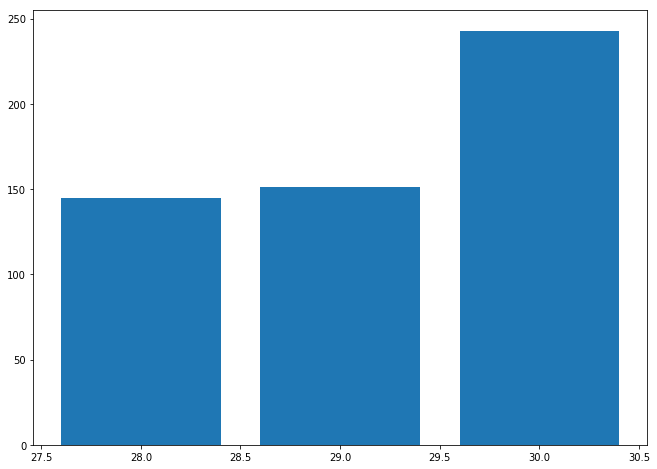

In [71]:
#fig = figure(plot_width=400, plot_height=400)
plt.bar(dataset['day'], dataset['volume'])
#fig.circle(dataset['day'], dataset['volume'], fill_color="yellow", size=10)
plt.rcParams['figure.figsize'] = (11,8)
plt.show()